### Implement A* Algorithm

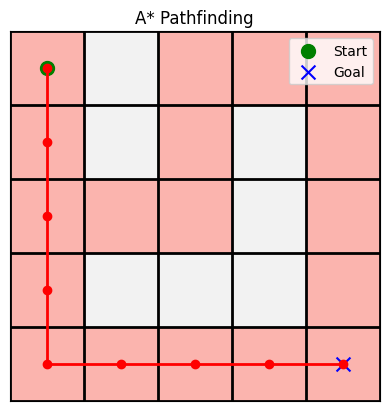

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Define the heuristic function (Manhattan distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* search algorithm
def astar_search(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        neighbors = [(current[0] + x, current[1] + y) for x, y in [(0, 1), (1, 0), (0, -1), (-1, 0)]]
        for neighbor in neighbors:
            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]):
                if grid[neighbor[0]][neighbor[1]] == 1:
                    continue

                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None

# Example grid (0 = walkable, 1 = obstacle)
grid = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]
start = (0, 0)
goal = (4, 4)

# Run A* search
path = astar_search(grid, start, goal)

# Visualization
def visualize_path(grid, path, start, goal):
    grid_array = np.array(grid)
    fig, ax = plt.subplots()

    # Plot the grid
    ax.imshow(grid_array, cmap=plt.cm.Pastel1)
    # Plot the path
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_y, path_x, color='red', linewidth=2, marker='o')
    # Mark start and goal
    ax.scatter(start[1], start[0], marker="o", color="green", s=100, label="Start")
    ax.scatter(goal[1], goal[0], marker="x", color="blue", s=100, label="Goal")
    # Set labels and title
    ax.set_xticks(np.arange(-0.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(grid), 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

    plt.title("A* Pathfinding")
    plt.legend()
    plt.show()

# Visualize the grid and the path
visualize_path(grid, path, start, goal)